# **Deep Learning** _Day 125_
##### Name: Muhammad Hassaan
##### Date: August 29, 2024
##### Email: muhammadhassaan7896@gmail.com

# **Prophet Model From Facebook to be used in Time Series Analysis**

In [114]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [115]:
# load the daily climate change data
df = pd.read_csv('./data/DailyDelhiClimateTrain.csv', index_col="date", parse_dates=True)
# df = pd.read_csv('./data/DailyDelhiClimateTrain.csv')
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [117]:
# chech the summary statistics of the data 
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

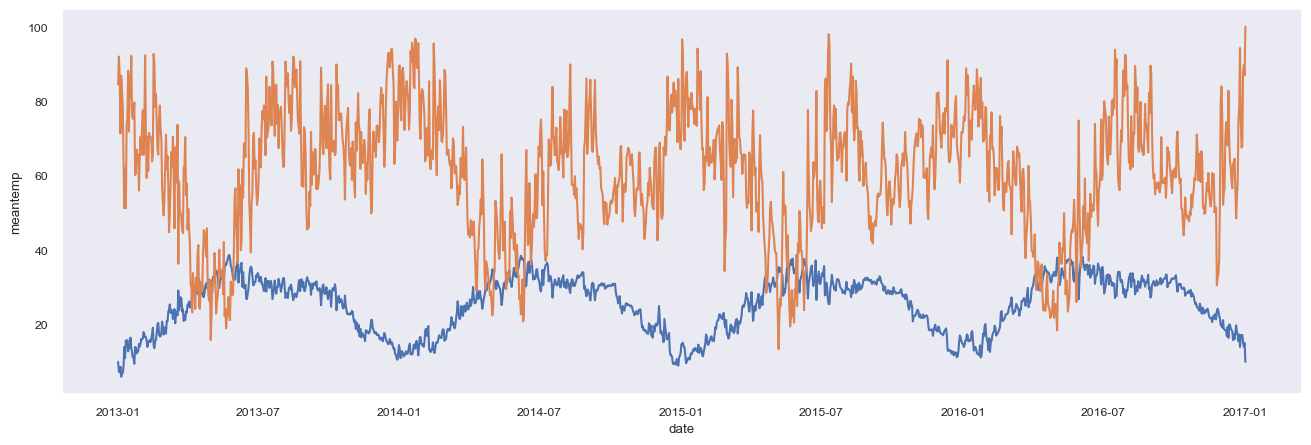

In [118]:
# draw a line plot using seaborn
sns.set(rc={'figure.figsize': (16, 5)},  font_scale=0.8, style='dark')
sns.lineplot(x='date', y='meantemp', data=df)
sns.lineplot(x='date', y='humidity', data=df)

In [119]:
# draw line plot using plotly
fig = px.line(x = df.index, y = df['meantemp'] , title = 'LinePlot', labels = {'x': 'date', 'y': 'meantemp'})
fig.show()           

In [120]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [121]:
# Create the figure
fig = go.Figure()

# Add the first line
fig.add_trace(go.Scatter(x=df.index, y=df['meantemp'], mode='lines', name='Mean Temperature', line=dict(color='red')))

# Add the second line
fig.add_trace(go.Scatter(x=df.index, y=df['humidity'], mode='lines', name='Humidity', line=dict(color='blue')))

# Add the third line
fig.add_trace(go.Scatter(x=df.index, y=df['wind_speed'], mode='lines', name='Wind Speed', line=dict(color='orange')))

# Update layout
fig.update_layout(title='Line Plot', xaxis_title='Date', yaxis_title='Lines')

# Show the figure
fig.show()

In [122]:
# make a scatter plot between meantemp and humidity using plotly
fig = px.scatter(df, x="meantemp", y="humidity", 
                 title="Scatter Plot of Mean Temperature vs Humidity",
                 labels={"meantemp": "Mean Temperature", "humidity": "Humidity"},
                 trendline="ols",
                 trendline_color_override="red")
fig.show()

In [123]:
# chech personr correlation between meantemp and humidity 
from scipy.stats import pearsonr
corr, _ = pearsonr(df['meantemp'], df['humidity'])
print("Pearson Correlation: %3f" % corr) 

Pearson Correlation: -0.571951


In [124]:
# # Calculate the correlation matrix
# corr_matrix = df.corr()

# # Create the heatmap
# colorscale = 'Viridis'

# # Create the heatmap
# fig = go.Figure(data=go.Heatmap(
#     z=corr_matrix.values,
#     x=corr_matrix.columns,
#     y=corr_matrix.index,
#     colorscale=colorscale,
#     hoverinfo='text',  # Display correlation values on hover
#     text=np.around(corr_matrix.values, 2)  # Display correlation values with 2 decimal places
# ))

# # Update the layout
# fig.update_layout(
#     title_text='Correlation Matrix',
#     xaxis_title='Features',
#     yaxis_title='Features'
# )

# # Show the plot
# fig.show()

<Axes: >

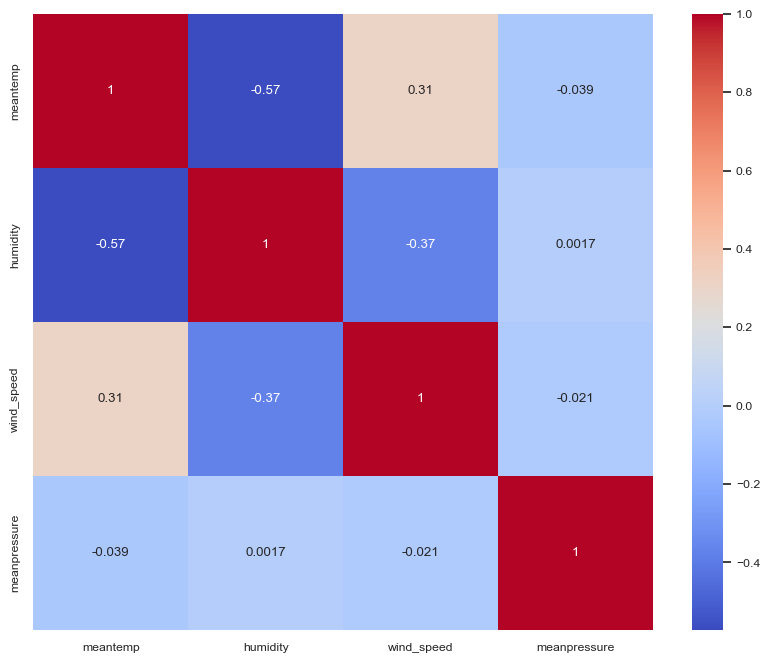

In [125]:
# create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='date', ylabel='meantemp'>

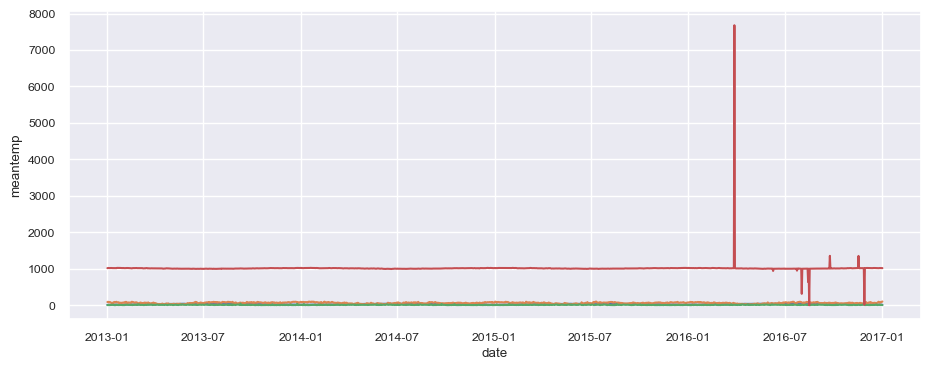

In [126]:
# draw a line plot
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df, x="date", y="meantemp")
sns.lineplot(data=df, x="date", y="humidity")
sns.lineplot(data=df, x="date", y="wind_speed")
sns.lineplot(data=df, x="date", y="meanpressure")

In [127]:
# interpolate the outliers from mean pressure column on 28.March.2016
df.loc['2016-03-28', 'meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-28']

meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

<Axes: xlabel='date', ylabel='meanpressure'>

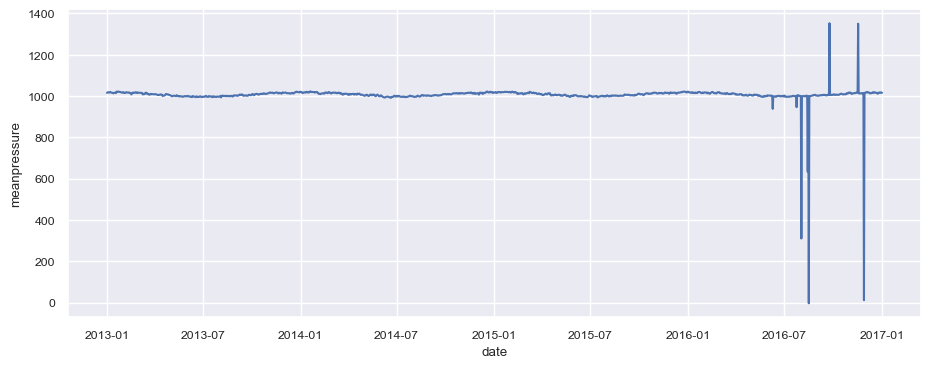

In [128]:
sns.lineplot(data=df, x="date", y="meanpressure")

In [129]:
# lets scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-1.927019e-15
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-2.242730e+01
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-1.102679e-01
50%,3.020541e-01,1.105528e-01,-1.273107e-01,4.485792e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,1.861053e-01
max,1.799551e+00,2.340044e+00,7.766988e+00,7.687749e+00


<Axes: xlabel='date', ylabel='meantemp'>

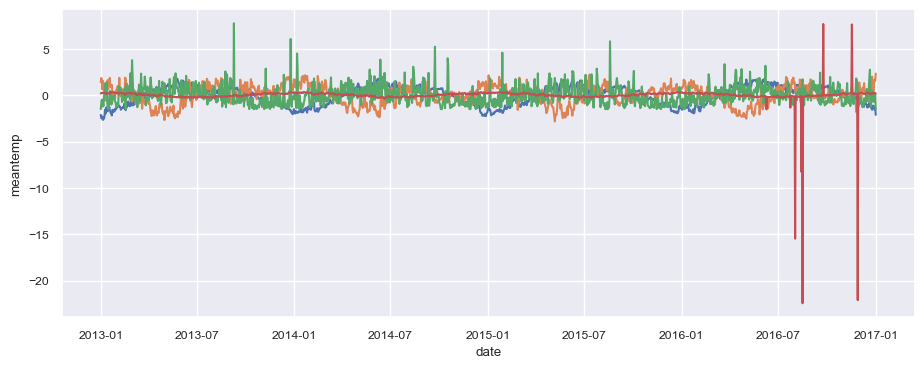

In [130]:
# draw a line plot
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df_scaled, x="date", y="meantemp")
sns.lineplot(data=df_scaled, x="date", y="humidity")
sns.lineplot(data=df_scaled, x="date", y="wind_speed")
sns.lineplot(data=df_scaled, x="date", y="meanpressure")

In [131]:
# add two columns in the dataset for month and year
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.202650,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.250041,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.269293,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.235972,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.221162,1,2013


In [132]:
# add two columns in the dataset for month and year
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


(1.0, 12.0)

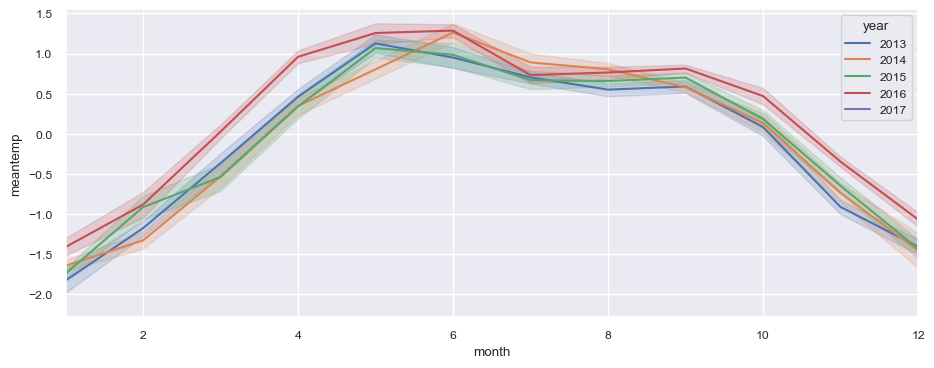

In [133]:
sns.lineplot(data=df_scaled, x="month", y="meantemp", hue="year", palette="deep")
plt.xlim(1, 12)

In [134]:
# same in plotly
fig = px.line(df_scaled, x=df_scaled.index , y="meantemp", color="year", title='Mean Temperature by Month')
fig.show()

In [135]:
# same in plotly
fig = px.line(df, x=df.index , y="meantemp", color="year", title='Mean Temperature by Month')
fig.show()

## **Lets Use the Prophet Model**

In [136]:
# load the data again 
df = pd.read_csv('./data/DailyDelhiClimateTrain.csv')

# rename the columns in data 
df = df.rename(columns={'date': 'ds', 'meantemp': 'y'})
df.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [137]:
# import prophet model
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# call the model
model = Prophet()

# fit the model
model.fit(df)

# forecast 
forecast = model.make_future_dataframe(periods=365)
forecast = model.predict(forecast)

01:13:43 - cmdstanpy - INFO - Chain [1] start processing
01:13:43 - cmdstanpy - INFO - Chain [1] done processing


In [138]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.689997,9.245782,14.384726,24.689997,24.689997,-12.939197,-12.939197,-12.939197,0.034058,0.034058,0.034058,-12.973255,-12.973255,-12.973255,0.0,0.0,0.0,11.750800
1,2013-01-02,24.690142,9.303840,14.381735,24.690142,24.690142,-12.803590,-12.803590,-12.803590,0.146275,0.146275,0.146275,-12.949865,-12.949865,-12.949865,0.0,0.0,0.0,11.886552
2,2013-01-03,24.690287,9.243714,14.263508,24.690287,24.690287,-12.844073,-12.844073,-12.844073,0.067163,0.067163,0.067163,-12.911235,-12.911235,-12.911235,0.0,0.0,0.0,11.846214
3,2013-01-04,24.690432,9.400761,14.539588,24.690432,24.690432,-12.831776,-12.831776,-12.831776,0.027535,0.027535,0.027535,-12.859310,-12.859310,-12.859310,0.0,0.0,0.0,11.858656
4,2013-01-05,24.690577,9.209649,14.467427,24.690577,24.690577,-12.865204,-12.865204,-12.865204,-0.069124,-0.069124,-0.069124,-12.796081,-12.796081,-12.796081,0.0,0.0,0.0,11.825373


In [139]:
# plot it 
plot_plotly(model, forecast)

In [140]:
# diagnose model fit on the training data
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_true = df['y']
y_pred = forecast['yhat'][:len(df)]
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("MSE: ", mean_squared_error(y_true, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_true, y_pred)))

MAE:  1.5983513867032428
MSE:  4.121723316296451
RMSE:  2.0302027771374096


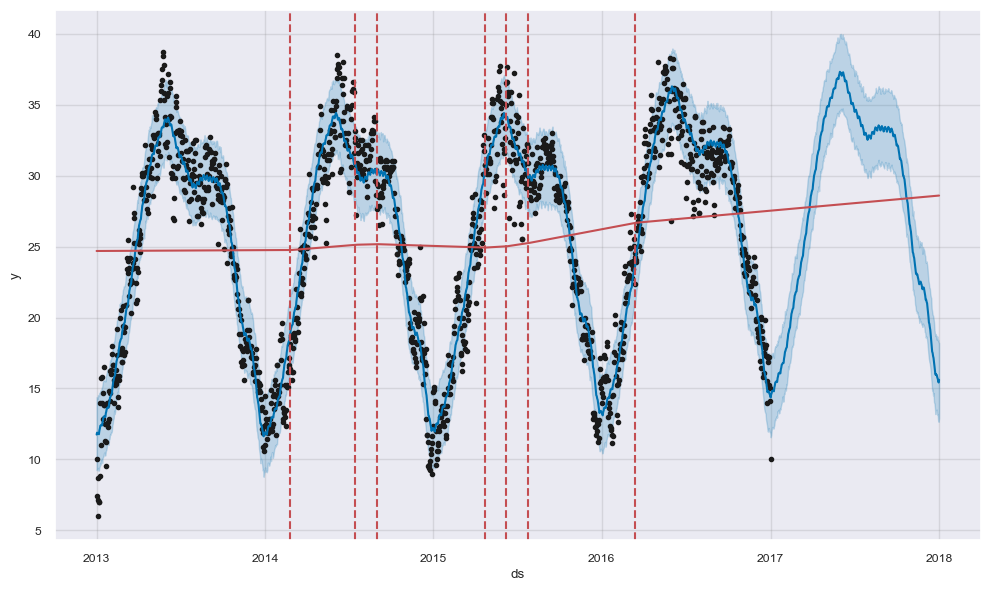

In [141]:
from prophet.plot import add_changepoints_to_plot

# plot model fitness on training data set and validation data set
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

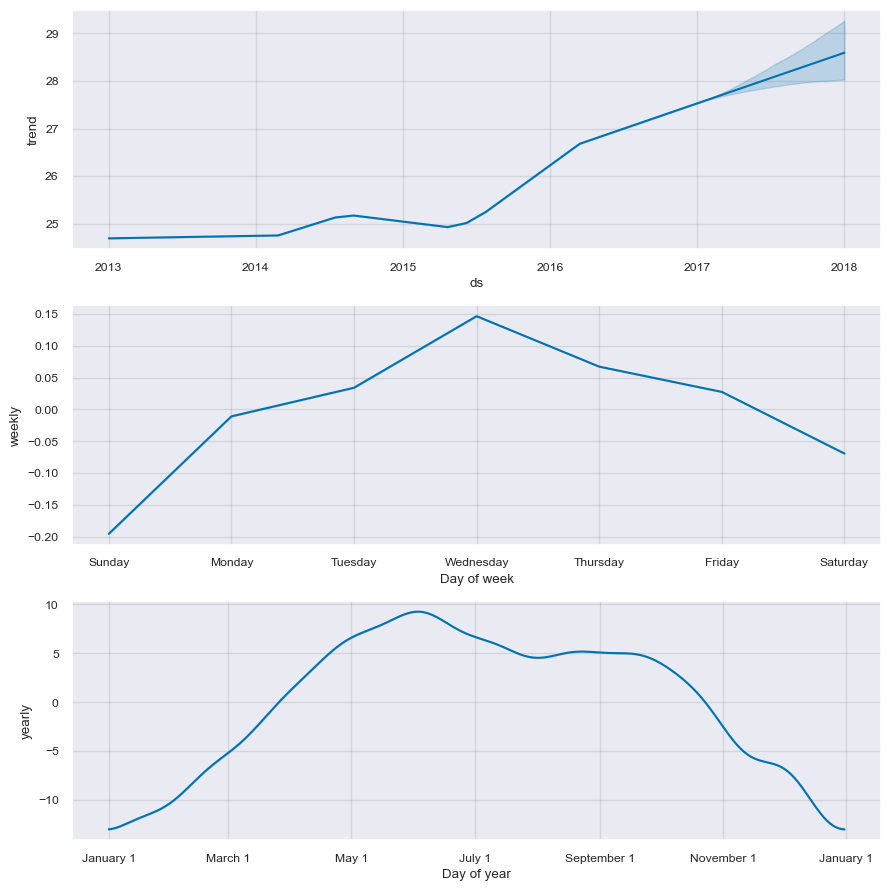

In [142]:
# plot model components
fig = model.plot_components(forecast)

01:18:58 - cmdstanpy - INFO - Chain [1] start processing
01:18:59 - cmdstanpy - INFO - Chain [1] done processing


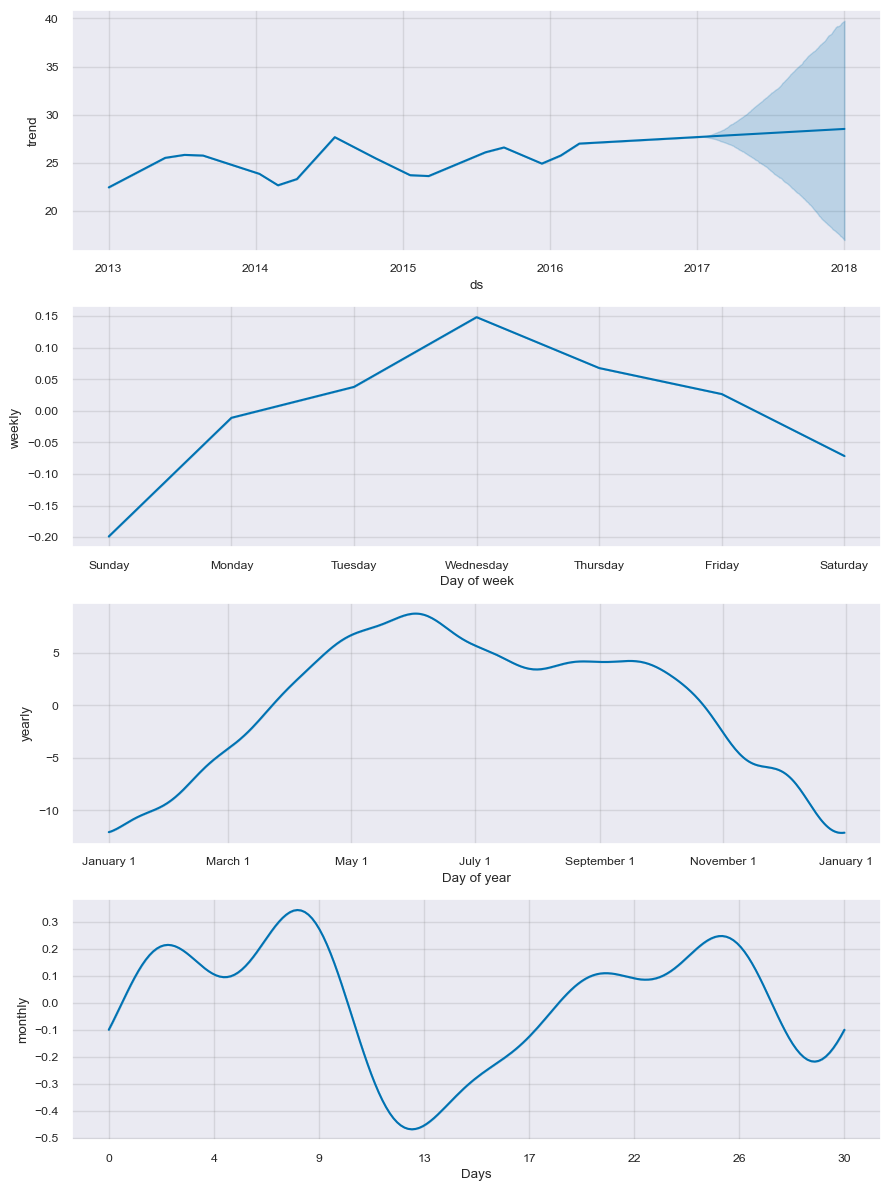

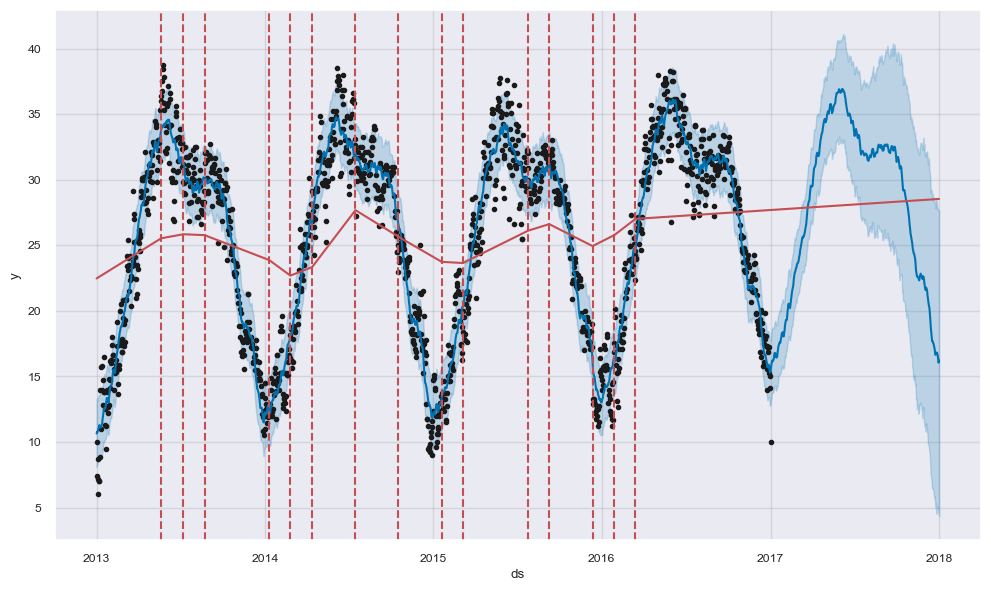

In [143]:
# model more components
model = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.1, holidays_prior_scale=0.1)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df)
forecast = model.make_future_dataframe(periods=365)
forecast = model.predict(forecast)
fig = model.plot_components(forecast)

# plot model fitness on training data set and validation data set
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [144]:
# interpret the output
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/3 [00:00<?, ?it/s]01:19:44 - cmdstanpy - INFO - Chain [1] start processing
01:19:44 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:01<00:02,  1.16s/it]01:19:45 - cmdstanpy - INFO - Chain [1] start processing
01:19:45 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:02<00:01,  1.04s/it]01:19:46 - cmdstanpy - INFO - Chain [1] start processing
01:19:47 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-08,12.711378,10.338477,14.944402,10.000,2015-01-07
1,2015-01-09,12.603683,10.307547,14.985305,10.625,2015-01-07
2,2015-01-10,12.405971,9.985421,14.705576,11.125,2015-01-07
3,2015-01-11,12.079905,9.714165,14.441514,11.000,2015-01-07
4,2015-01-12,12.306276,9.776773,14.542419,10.625,2015-01-07
